<a href="https://colab.research.google.com/github/Prashanth1234545/pfsinterns/blob/main/pfsinterns_Task_2_Customer_Segmentation_for_E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
data = pd.read_csv('/archive (1).zip')
print(data.head())

data = data.drop(columns=['Customer ID'])
data = data.dropna()


   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

In [26]:
data.describe()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Cluster
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,33.577586,847.793103,12.632184,4.023563,26.614943,1.169540
std,4.878024,361.692375,4.146079,0.579145,13.474750,1.074994
min,26.000000,410.800000,7.000000,3.000000,9.000000,0.000000
25%,30.000000,505.750000,9.000000,3.500000,15.000000,0.000000
50%,32.000000,780.200000,12.000000,4.100000,23.000000,1.000000
75%,37.000000,1160.600000,15.000000,4.500000,38.000000,2.000000
max,43.000000,1520.100000,21.000000,4.900000,63.000000,3.000000


In [9]:
numerical_cols = data.select_dtypes(include=np.number)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_cols)

data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_cols.columns)

In [11]:
def plot_elbow_curve(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method For Optimal Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    plot_elbow_curve(data_scaled)

In [22]:
cluster_analysis = data.groupby('Cluster').agg({
    "Age": "mean",
    "Total Spend": "mean",
    "Items Purchased": "mean"

})

print("Cluster Analysis:\n", cluster_analysis)

Cluster Analysis:
                Age  Total Spend  Items Purchased
Cluster                                         
0        32.427350   983.337607        13.444444
1        39.403509   474.223684         8.517544
2        28.948276   690.389655        11.637931
3        29.152542  1455.549153        19.949153


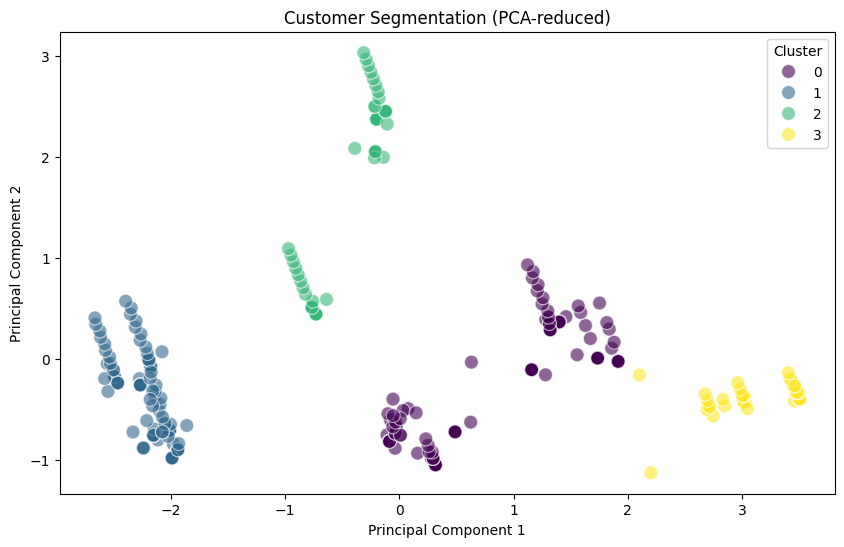

In [23]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.6)
plt.title('Customer Segmentation (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()